In [ ]:
import pandas as pd

# Substitua o caminho pelo correto
df = pd.read_csv(r'C:\Users\SpawN\Desktop\Steam\steam_games.csv')

In [11]:
# Exibe as primeiras 5 linhas do DataFrame 'df' no console. 
# Útil para visualizar uma amostra inicial dos dados e verificar se eles foram carregados corretamente.
print(df.head())


     AppID                   Name  Release date Estimated owners  Peak CCU  \
0    20200       Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370           Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930           Jolt Project  Nov 17, 2021        0 - 20000         0   
3  1355720               Henosis™  Jul 23, 2020        0 - 20000         0   
4  1139950  Two Weeks in Painland   Feb 3, 2020        0 - 20000         0   

   Required age  Price  DLC count  \
0             0  19.99          0   
1             0   0.99          0   
2             0   4.99          0   
3             0   5.99          0   
4             0   0.00          0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a new robotics ...   
3  HENOSIS™ is a mysterious 2D Platform Puzzler w...   
4  ABOUT THE GAME Play as a 

In [12]:
# Exibe no console todas as colunas disponíveis no DataFrame 'df'.
# Útil para entender a estrutura do DataFrame e verificar quais dados estão disponíveis para análise.
print(df.columns)


Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


In [19]:
class SteamDataProcessor:
    def __init__(self, file_path):
        # Carrega os dados ao instanciar o objeto
        self.file_path = file_path
        self.dados = None
        self.processed_data = None
        self._load_data()
    
    def _load_data(self):
        """Carrega e processa os dados iniciais"""
        self.dados = pd.read_csv(self.file_path)
        self.dados = self.dados[['Name', 'Release date', 'Metacritic score', 'Developers', 'Genres']]
        self.dados = self.dados.rename(columns={
            'Release date': 'ReleaseDate',
            'Metacritic score': 'Score'
        })
        self.dados = self.dados.dropna(subset=['Score', 'ReleaseDate'])
        self.dados['Score'] = self.dados['Score'].astype(int)
        self.dados['ReleaseDate'] = pd.to_datetime(self.dados['ReleaseDate'], errors='coerce')
        self.dados = self.dados.dropna(subset=['ReleaseDate'])
    
    def get_top_rated_games(self, top_n=10):
        """Obtém os jogos mais bem avaliados, sem duplicatas"""
        # Ordena por pontuação e data
        ordered_data = self.dados.sort_values(by=['Score', 'ReleaseDate'], ascending=[False, True])
        # Remove duplicatas baseadas no nome do jogo
        unique_data = ordered_data.drop_duplicates(subset=['Name'])
        # Seleciona os N melhores
        top_games = unique_data.head(top_n)
        # Retorna as colunas relevantes
        return top_games[['Name', 'ReleaseDate', 'Score']]

# Uso do objeto
file_path = r'C:\Users\SpawN\Desktop\Steam\steam_games.csv'
steam_processor = SteamDataProcessor(file_path)

# Obtém os 10 jogos mais bem avaliados
top_10 = steam_processor.get_top_rated_games(top_n=10)

# Exibe os resultados
print(top_10)

                                                    Name ReleaseDate  Score
45752                      Disco Elysium - The Final Cut  2019-10-15     97
64935                                    Persona 5 Royal  2022-10-20     97
49557                                          Half-Life  1998-11-08     96
36775                                        Half-Life 2  2004-11-16     96
32406                                          BioShock™  2007-08-21     96
57205                                 Grand Theft Auto V  2015-04-13     96
28170                                           Portal 2  2011-04-18     95
12746                       Sid Meier's Civilization® IV  2006-10-25     94
37184                                              QUAKE  2007-08-03     94
19291  The Elder Scrolls IV: Oblivion® Game of the Ye...  2009-06-16     94


In [1]:
import os

class SteamDataProcessor:
    def __init__(self, file_path):
        """
        Inicializa o objeto com o caminho do arquivo.
        :param file_path: Caminho absoluto ou relativo para o arquivo CSV.
        """
        self.file_path = file_path
        self.dados = None

    def load_data(self):
        """
        Carrega o arquivo CSV e armazena os dados em um DataFrame.
        :return: DataFrame contendo os dados do CSV.
        """
        try:
            # Verifica se o arquivo existe antes de carregar
            if not os.path.exists(self.file_path):
                raise FileNotFoundError(f"Erro: O arquivo '{self.file_path}' não foi encontrado.")

            # Tenta carregar o arquivo CSV
            self.dados = pd.read_csv(self.file_path, encoding='utf-8')  # Pode ajustar a codificação se necessário
            return self.dados

        except FileNotFoundError as fnf_error:
            print(fnf_error)
        except pd.errors.ParserError as parse_error:
            print("Erro ao interpretar o arquivo CSV. Verifique o formato do arquivo.")
            print(parse_error)
        except Exception as e:
            print(f"Erro inesperado: {e}")
        
        return None

    def process_rpg_games(self):
        """
        Processa os jogos de RPG, realizando os cálculos solicitados.
        :return: Resultados das médias e máximos calculados.
        """
        if self.dados is None:
            print("Os dados não foram carregados.")
            return None

        # Filtra os jogos de RPG
        jogos_rpg = self.dados[self.dados['Genres'].str.contains('RPG', case=False, na=False)].copy()

        # Converte as colunas necessárias para números, tratando valores ausentes
        jogos_rpg['DLC count'] = pd.to_numeric(jogos_rpg['DLC count'], errors='coerce')
        jogos_rpg['Positive'] = pd.to_numeric(jogos_rpg['Positive'], errors='coerce')
        jogos_rpg['Negative'] = pd.to_numeric(jogos_rpg['Negative'], errors='coerce')
        jogos_rpg['Screenshots'] = pd.to_numeric(jogos_rpg['Screenshots'], errors='coerce')
        jogos_rpg['Movies'] = pd.to_numeric(jogos_rpg['Movies'], errors='coerce')

        # Preenche valores ausentes (NaN) com 0 nas colunas de capturas de tela e filmes
        jogos_rpg['Screenshots'] = jogos_rpg['Screenshots'].fillna(0)
        jogos_rpg['Movies'] = jogos_rpg['Movies'].fillna(0)

        # Soma o número de capturas de tela e filmes
        jogos_rpg['Demos'] = jogos_rpg['Screenshots'] + jogos_rpg['Movies']

        # Calcula a média e o valor máximo de DLCs, avaliações positivas, avaliações negativas e materiais de demonstração
        media_dlc = jogos_rpg['DLC count'].mean()
        max_dlc = jogos_rpg['DLC count'].max()

        media_positivo = jogos_rpg['Positive'].mean()
        max_positivo = jogos_rpg['Positive'].max()

        media_negativo = jogos_rpg['Negative'].mean()
        max_negativo = jogos_rpg['Negative'].max()

        media_demos = jogos_rpg['Demos'].mean()
        max_demos = jogos_rpg['Demos'].max()

        # Exibe os resultados
        results = {
            'Média de DLCs': media_dlc,
            'Máximo de DLCs': max_dlc,
            'Média de Avaliações Positivas': media_positivo,
            'Máximo de Avaliações Positivas': max_positivo,
            'Média de Avaliações Negativas': media_negativo,
            'Máximo de Avaliações Negativas': max_negativo,
            'Média de Materiais de Demonstração (capturas de tela + filmes)': media_demos,
            'Máximo de Materiais de Demonstração': max_demos
        }

        return results

# Caminho do arquivo
file_path = r'C:\Users\SpawN\Desktop\Steam\steam_games.csv'

# Instancia o processador de dados
processor = SteamDataProcessor(file_path)

# Carrega os dados
df = processor.load_data()

# Verifica se os dados foram carregados corretamente
if df is not None:
    # Processa os jogos de RPG e exibe os resultados
    resultados = processor.process_rpg_games()
    if resultados:
        for key, value in resultados.items():
            print(f'{key}: {value:.2f}' if isinstance(value, float) else f'{key}: {value}')


NameError: name 'pd' is not defined

In [34]:
# Criando um dicionário com os dados formatados
empresas_resultados = {
    'Big Fish Games': {'Média Avaliações Positivas': 7.363431151241535, 'Mediana Avaliações Positivas': 5.0},
    '8floor': {'Média Avaliações Positivas': 4.460251046025105, 'Mediana Avaliações Positivas': 3.0},
    'Strategy First': {'Média Avaliações Positivas': 276.45061728395063, 'Mediana Avaliações Positivas': 23.0},
    'Laush Studio': {'Média Avaliações Positivas': 19.777070063694268, 'Mediana Avaliações Positivas': 12.0},
    'HH-Games': {'Média Avaliações Positivas': 10.538461538461538, 'Mediana Avaliações Positivas': 9.0}
}

# Formatando a saída para exibição mais legível
for empresa, dados in empresas_resultados.items():
    print(f"{empresa}")
    print(f"  - Média de Avaliações Positivas: {dados['Média Avaliações Positivas']:.2f}")
    print(f"  - Mediana de Avaliações Positivas: {dados['Mediana Avaliações Positivas']:.2f}")
    print()


Big Fish Games
  - Média de Avaliações Positivas: 7.36
  - Mediana de Avaliações Positivas: 5.00

8floor
  - Média de Avaliações Positivas: 4.46
  - Mediana de Avaliações Positivas: 3.00

Strategy First
  - Média de Avaliações Positivas: 276.45
  - Mediana de Avaliações Positivas: 23.00

Laush Studio
  - Média de Avaliações Positivas: 19.78
  - Mediana de Avaliações Positivas: 12.00

HH-Games
  - Média de Avaliações Positivas: 10.54
  - Mediana de Avaliações Positivas: 9.00



Número de jogos que suportam Linux entre 2018 e 2022:
Ano 2018: 1187 jogos
Ano 2019: 922 jogos
Ano 2020: 1082 jogos
Ano 2021: 1210 jogos
Ano 2022: 1311 jogos

Crescimento percentual entre os anos:
Ano 2019: -22.33% de crescimento
Ano 2020: 17.35% de crescimento
Ano 2021: 11.83% de crescimento
Ano 2022: 8.35% de crescimento


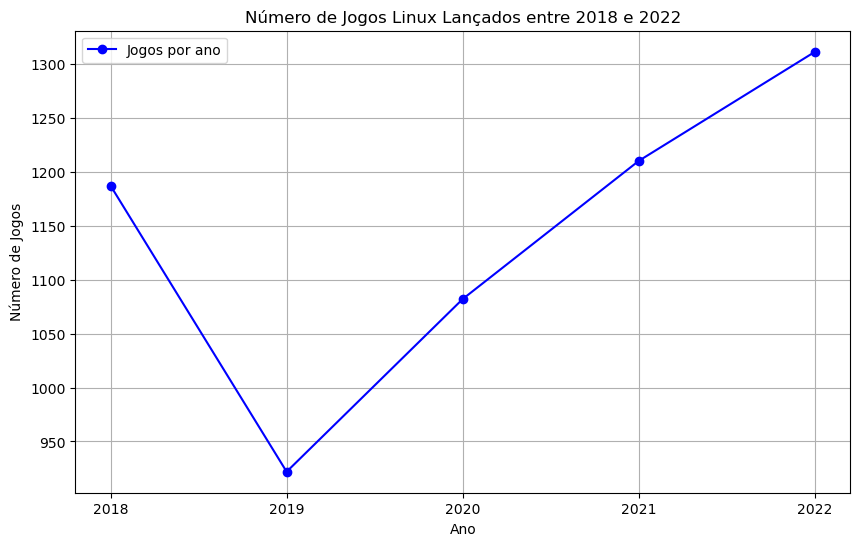

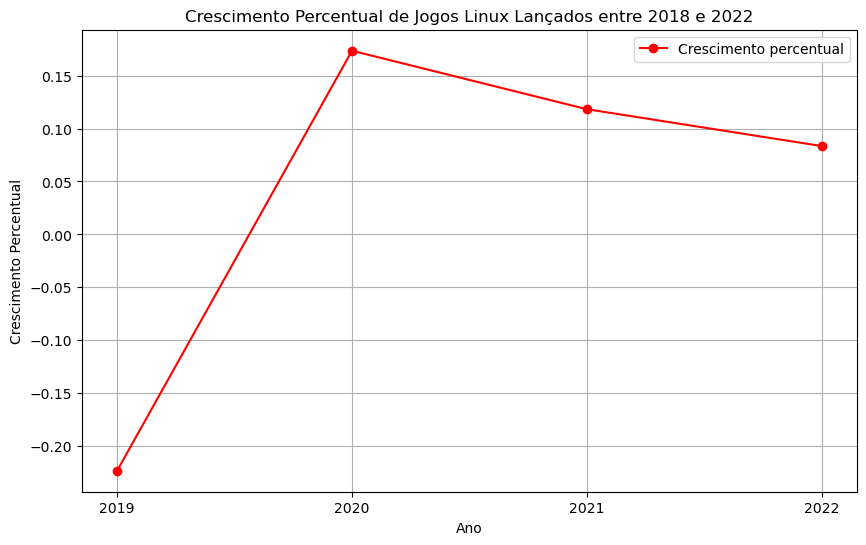

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo CSV para o DataFrame 'jogos'
jogos = pd.read_csv('C:\\Users\\SpawN\\Desktop\\Steam\\steam_games.csv')

# Filtrando os jogos que suportam Linux (onde a coluna 'Linux' tem o valor 1)
jogos_linux = jogos[jogos['Linux'] == 1].copy()  # Criando uma cópia explícita

# Convertendo a coluna 'Release date' para datetime e extraindo o ano de lançamento
jogos_linux.loc[:, 'Release year'] = pd.to_datetime(jogos_linux['Release date'], errors='coerce').dt.year

# Filtrando apenas os jogos lançados entre 2018 e 2022
jogos_linux = jogos_linux[jogos_linux['Release year'].between(2018, 2022)]

# Contando o número de jogos por ano de lançamento
contagem_ano = jogos_linux.groupby('Release year').size()

# Exibindo a contagem de jogos por ano de forma amigável
print("Número de jogos que suportam Linux entre 2018 e 2022:")
for ano, quantidade in contagem_ano.items():
    print(f"Ano {int(ano)}: {quantidade} jogos")

# Verificando a tendência de crescimento (percentual de crescimento)
crescimento = contagem_ano.pct_change().dropna()  # Calculando a variação percentual entre os anos
print("\nCrescimento percentual entre os anos:")
for ano, crescimento_percentual in crescimento.items():
    print(f"Ano {int(ano)}: {crescimento_percentual*100:.2f}% de crescimento")

# Opcional: Exibir um gráfico para visualizar o crescimento
plt.figure(figsize=(10,6))
plt.plot(contagem_ano.index, contagem_ano.values, marker='o', color='b', label='Jogos por ano')
plt.title('Número de Jogos Linux Lançados entre 2018 e 2022')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos')
plt.xticks(contagem_ano.index.astype(int))  # Remover o .0 e exibir como inteiros
plt.grid(True)
plt.legend()
plt.show()

# Opcional: Exibindo o crescimento percentual em um gráfico
plt.figure(figsize=(10,6))
plt.plot(crescimento.index, crescimento.values, marker='o', color='r', label='Crescimento percentual')
plt.title('Crescimento Percentual de Jogos Linux Lançados entre 2018 e 2022')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual')
plt.xticks(crescimento.index.astype(int))  # Remover o .0 e exibir como inteiros
plt.grid(True)
plt.legend()
plt.show()

In [38]:
# Agrupar os jogos por desenvolvedor
jogos_por_desenvolvedor = jogos.groupby('Developers').size().reset_index(name='Number of Games')

# Calcular a média de avaliações positivas por desenvolvedor
# Verifique se a coluna de avaliações positivas é 'Positive' ou similar
jogos['Positive'] = jogos['Positive'].fillna(0)  # Preencher valores nulos com 0, se necessário

# Calcular a média de avaliações positivas
media_avaliacoes_positivas = jogos.groupby('Developers')['Positive'].mean().reset_index(name='Average Positive Reviews')

# Exibir os 5 desenvolvedores que mais publicaram jogos e a média de avaliações positivas
top_5_desenvolvedores = jogos_por_desenvolvedor.sort_values(by='Number of Games', ascending=False).head(5)
top_5_desenvolvedores = top_5_desenvolvedores.merge(media_avaliacoes_positivas, on='Developers')

# Exibir o resultado
print(top_5_desenvolvedores)


                 Developers  Number of Games  Average Positive Reviews
0           Choice of Games              148                 46.270270
1                   Creobit              136                293.066176
2  Laush Dmitriy Sergeevich              135                 18.792593
3        Boogygames Studios              104                  5.682692
4         Sokpop Collective              100                 30.950000


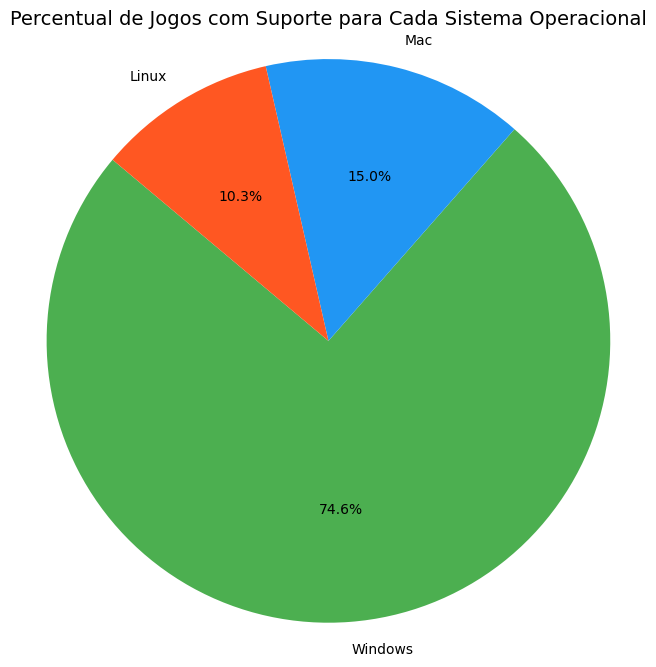

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
jogos = pd.read_csv('C:\\Users\\SpawN\\Desktop\\Steam\\steam_games.csv')

# Contar o número de jogos que possuem suporte para cada sistema operacional
suporte_so = {
    'Windows': jogos['Windows'].sum(),
    'Mac': jogos['Mac'].sum(),
    'Linux': jogos['Linux'].sum()
}

# Calcular o total de jogos
total_jogos = len(jogos)

# Calcular o percentual de jogos que suportam cada sistema operacional
percentual_so = {so: (count / total_jogos) * 100 for so, count in suporte_so.items()}

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(percentual_so.values(), labels=percentual_so.keys(), autopct='%1.1f%%', colors=['#4CAF50', '#2196F3', '#FF5722'], startangle=140)
plt.title('Percentual de Jogos com Suporte para Cada Sistema Operacional', fontsize=14)

# Exibir o gráfico
plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo
plt.show()


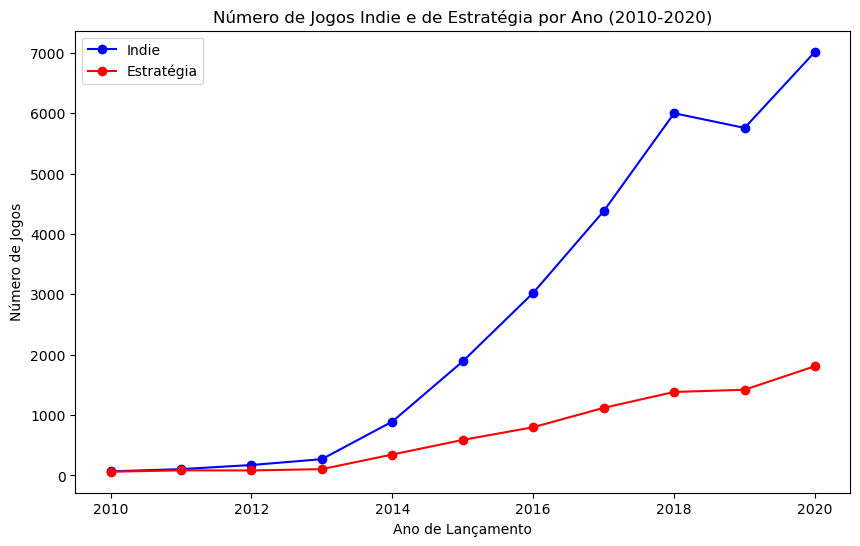

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dados do arquivo CSV
dados = pd.read_csv(r"C:\Users\SpawN\Desktop\Steam\steam_games.csv")

# Cria uma cópia do DataFrame original para evitar o SettingWithCopyWarning
jogos_indie_estrategia = dados.copy()

# Adiciona colunas para os gêneros Indie e Strategy de forma segura com .loc
# A aplicação do lambda usa a função 'str.contains' para verificar a presença dos gêneros na coluna 'Genres'
jogos_indie_estrategia.loc[:, 'Indie'] = jogos_indie_estrategia['Genres'].apply(lambda x: 'Indie' in x if isinstance(x, str) else False)
jogos_indie_estrategia.loc[:, 'Strategy'] = jogos_indie_estrategia['Genres'].apply(lambda x: 'Strategy' in x if isinstance(x, str) else False)

# Converte a coluna 'Release date' para ano de forma segura
jogos_indie_estrategia.loc[:, 'Release year'] = pd.to_datetime(jogos_indie_estrategia['Release date'], errors='coerce').dt.year

# Filtra os jogos lançados entre 2010 e 2020
jogos_indie_estrategia_2010_2020 = jogos_indie_estrategia[jogos_indie_estrategia['Release year'].between(2010, 2020)]

# Agrupa os dados por ano e soma os jogos de Indie e Strategy
jogos_agrupados = jogos_indie_estrategia_2010_2020.groupby('Release year').agg({'Indie': 'sum', 'Strategy': 'sum'})

# Cria o gráfico
plt.figure(figsize=(10, 6))

# Plot para o gênero Indie
plt.plot(jogos_agrupados.index, jogos_agrupados['Indie'], label='Indie', marker='o', linestyle='-', color='b')

# Plot para o gênero Strategy
plt.plot(jogos_agrupados.index, jogos_agrupados['Strategy'], label='Estratégia', marker='o', linestyle='-', color='r')

# Adiciona título e rótulos
plt.title('Número de Jogos Indie e de Estratégia por Ano (2010-2020)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.legend()

# Exibe o gráfico
plt.show()


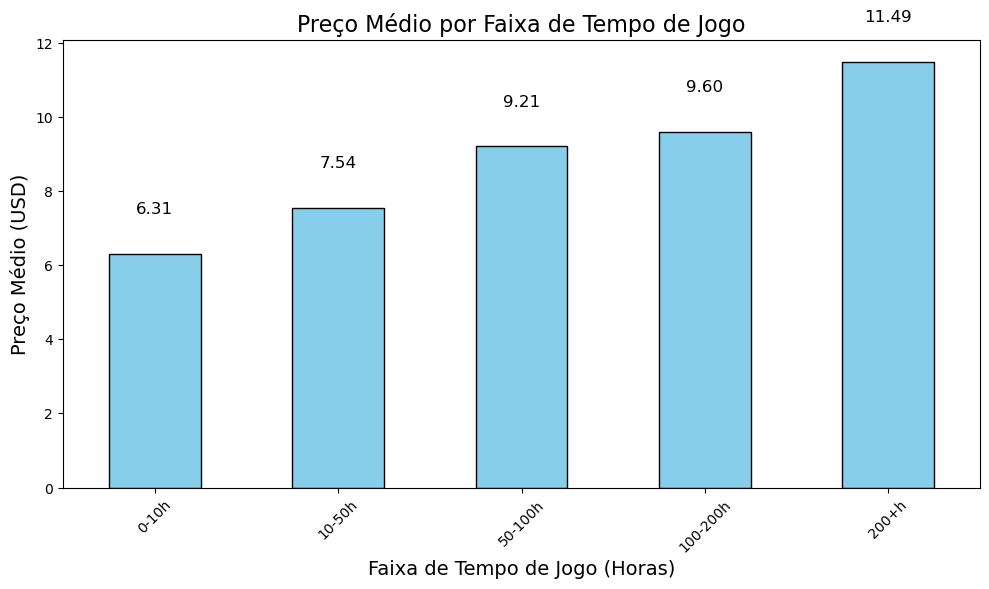

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificando jogos com tempo de jogo e preço válidos
jogos_validos_temporais = jogos_indie_estrategia.dropna(subset=['Average playtime forever', 'Price'])

# Definindo faixas de tempo de jogo (em horas)
bins = [0, 10, 50, 100, 200, 1000]  # Faixas de tempo de jogo
labels = ['0-10h', '10-50h', '50-100h', '100-200h', '200+h']  # Rótulos para as faixas

# Criando uma nova coluna 'Playtime category' com base nas faixas de tempo
jogos_validos_temporais['Playtime category'] = pd.cut(jogos_validos_temporais['Average playtime forever'], bins=bins, labels=labels, right=False)

# Calculando o preço médio por faixa de tempo de jogo
preco_medio_por_faixa = jogos_validos_temporais.groupby('Playtime category', observed=False)['Price'].mean()

# Plotando o gráfico de barras
plt.figure(figsize=(10,6))
preco_medio_por_faixa.plot(kind='bar', color='skyblue', edgecolor='black')

# Melhorando a visualização: exibição do preço com 2 casas decimais
plt.title('Preço Médio por Faixa de Tempo de Jogo', fontsize=16)
plt.xlabel('Faixa de Tempo de Jogo (Horas)', fontsize=14)
plt.ylabel('Preço Médio (USD)', fontsize=14)

# Exibindo o preço no topo de cada barra
for i, v in enumerate(preco_medio_por_faixa):
    plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Ajuste visual
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

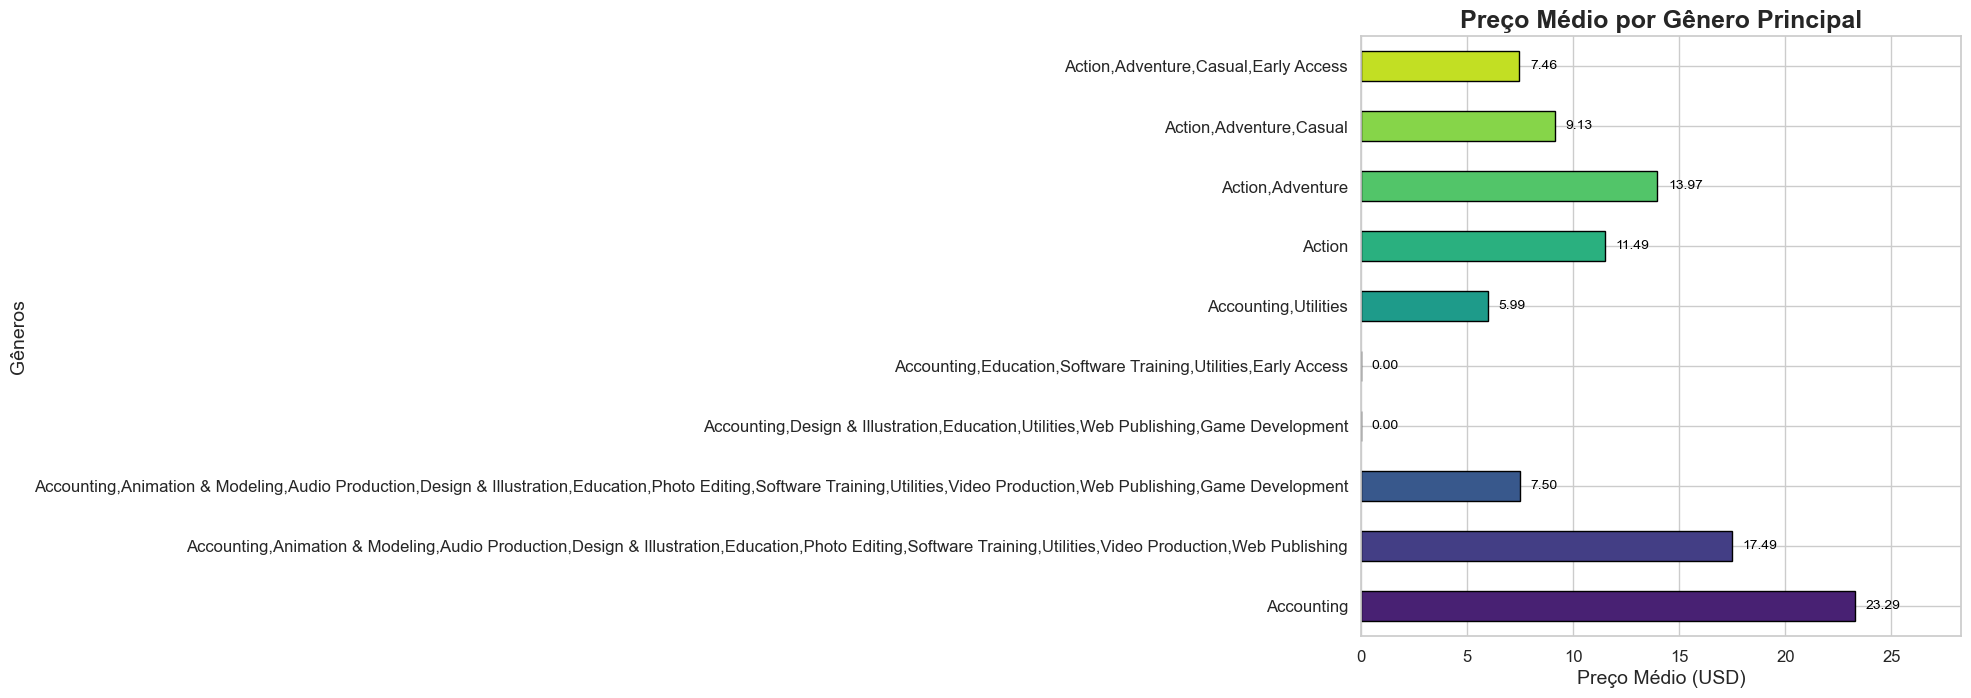

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame seja 'dados' e você tenha uma coluna 'Genres' e 'Price'
# Calcular o preço médio por gênero
preco_medio_por_genero = dados.groupby('Genres')['Price'].mean()

# Configurando estilo do Seaborn
sns.set(style="whitegrid")

# Selecionando uma amostra limitada dos gêneros, se necessário
amostra_generos = preco_medio_por_genero.head(10)  # Exibe apenas os 10 gêneros mais frequentes

# Criando o gráfico de barras com melhorias
plt.figure(figsize=(16, 12))  # Tamanho aumentado da figura
colors = sns.color_palette("viridis", len(amostra_generos))

# Plota as barras horizontais
ax = amostra_generos.plot(
    kind='barh', 
    color=colors, 
    edgecolor='black',
    figsize=(10, 8)
)

# Adicionando valores nas barras
for index, value in enumerate(amostra_generos):
    ax.text(value + 0.5, index, f'{value:.2f}', va='center', fontsize=10, color='black')

# Títulos e rótulos aprimorados
plt.title('Preço Médio por Gênero Principal', fontsize=18, weight='bold')
plt.xlabel('Preço Médio (USD)', fontsize=14)
plt.ylabel('Gêneros', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustando limites do eixo X
plt.xlim(0, max(amostra_generos) + 5)

# Ajustando manualmente o layout para aumentar as margens e garantir que tudo se ajuste corretamente
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.15)

# Exibindo o gráfico
plt.show()
